In [167]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import kdtree
import pandas as pd
import numpy as np
import os
from config import api_key

#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number, city name, and requested URL.
#Save both a CSV of all data retrieved and png images for each scatter plot.

In [184]:
%%time
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
latitudes =[]
longitudes=[]
clouds =[]
temps=[]
humidities=[]
windspeeds=[]
names=[]
nl='\n'
counter = 1
range_value = 600
for x in range(range_value):
    #generate random numbers in latitude range of -90to90, rounded to two decimals
    lats = np.random.uniform(low=-90, high=90, size=(1,)).round(2)
    #generate random numbers in longitude range of -180 to 180, rounded to two decimals
    lons = np.random.uniform(low=-180, high=180, size=(1,)).round(2)
    city = citipy.nearest_city(lats,lons)
    country_code =city.country_code

    # Build query URL, with exception handling...
   
    try:
        query_url = url + "appid=" + api_key +"&q=" + str(city.city_name) +","+ str(country_code) + "&units=" + units
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temperature = weather_json['main']["temp"]
        humidity = weather_json["main"]["humidity"]
        windspeed=weather_json['wind']['speed']
        name = weather_json['name']
        country = weather_json['sys']['country']
        latitude = weather_json['coord']['lat']
        longitude= weather_json['coord']['lon']
        cloudiness = weather_json['clouds']['all']
        print(f"Now retrieving weather for city # {counter}: {name}, {country}. Latitude of {latitude},{nl}Longitude of {longitude},  Where Humidity is: {humidity}, Temperature of: {temperature},{nl}and Winspeed of {windspeed}")
        print(query_url)
        print(lats, lons)
        print()
        latitudes.append(latitude)
        longitudes.append(longitude)
        temps.append(temperature)
        clouds.append(cloudiness)
        humidities.append(humidity)
        windspeeds.append(windspeed)
        names.append(name)
    except KeyError:
        continue
    
    counter +=1
    
   


Now retrieving weather for city # 1: Nanzhou, CN. Latitude of 29.37,
Longitude of 112.41,  Where Humidity is: 69, Temperature of: 70.88,
and Winspeed of 7.16
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=nanzhou,cn&units=imperial
[ 29.22] [ 112.66]

Now retrieving weather for city # 2: Leningradskiy, RU. Latitude of 69.38,
Longitude of 178.42,  Where Humidity is: 92, Temperature of: -4.28,
and Winspeed of 24.45
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=leningradskiy,ru&units=imperial
[ 78.19] [ 176.54]

Now retrieving weather for city # 3: Arraial do Cabo, BR. Latitude of -22.97,
Longitude of -42.02,  Where Humidity is: 100, Temperature of: 74.88,
and Winspeed of 1.74
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=arraial do cabo,br&units=imperial
[-32.9] [-28.15]

Now retrieving weather for city # 4: Vila Franca do Campo, PT. Latitude of 37.72,
Longitude of 

Now retrieving weather for city # 29: Busselton, AU. Latitude of -33.64,
Longitude of 115.35,  Where Humidity is: 82, Temperature of: 75.51,
and Winspeed of 15.21
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=busselton,au&units=imperial
[-34.68] [ 113.94]

Now retrieving weather for city # 30: Iqaluit, CA. Latitude of 63.75,
Longitude of -68.52,  Where Humidity is: 78, Temperature of: 10.4,
and Winspeed of 4.7
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=iqaluit,ca&units=imperial
[ 64.43] [-70.57]

Now retrieving weather for city # 31: Ternate, ID. Latitude of 0.8,
Longitude of 127.4,  Where Humidity is: 97, Temperature of: 85.1,
and Winspeed of 4.65
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=ternate,id&units=imperial
[ 2.21] [ 128.07]

Now retrieving weather for city # 32: Sao Felix do Xingu, BR. Latitude of -6.64,
Longitude of -51.99,  Where Humidity is: 9

Now retrieving weather for city # 57: Yinchuan, CN. Latitude of 38.48,
Longitude of 106.21,  Where Humidity is: 32, Temperature of: 60.98,
and Winspeed of 4.59
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=yinchuan,cn&units=imperial
[ 38.25] [ 108.02]

Now retrieving weather for city # 58: Guerrero Negro, MX. Latitude of 27.97,
Longitude of -114.04,  Where Humidity is: 81, Temperature of: 63.23,
and Winspeed of 10.85
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=guerrero negro,mx&units=imperial
[ 12.74] [-130.25]

Now retrieving weather for city # 59: Predivinsk, RU. Latitude of 57.07,
Longitude of 93.44,  Where Humidity is: 66, Temperature of: -0.72,
and Winspeed of 3.53
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=predivinsk,ru&units=imperial
[ 56.89] [ 93.82]

Now retrieving weather for city # 60: Ushuaia, AR. Latitude of -54.81,
Longitude of -68.31,  Where 

Now retrieving weather for city # 85: Rikitea, PF. Latitude of -23.12,
Longitude of -134.97,  Where Humidity is: 100, Temperature of: 80.28,
and Winspeed of 18.23
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=rikitea,pf&units=imperial
[-47.61] [-129.69]

Now retrieving weather for city # 86: Lebu, CL. Latitude of -37.62,
Longitude of -73.65,  Where Humidity is: 100, Temperature of: 60.66,
and Winspeed of 3.02
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=lebu,cl&units=imperial
[-35.8] [-76.59]

Now retrieving weather for city # 87: Hobart, AU. Latitude of -42.88,
Longitude of 147.33,  Where Humidity is: 48, Temperature of: 64.4,
and Winspeed of 14.99
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=hobart,au&units=imperial
[-53.] [ 154.73]

Now retrieving weather for city # 88: Chumikan, RU. Latitude of 54.72,
Longitude of 135.31,  Where Humidity is: 62, Temperatur

Now retrieving weather for city # 113: Thompson, CA. Latitude of 55.74,
Longitude of -97.86,  Where Humidity is: 53, Temperature of: 26.6,
and Winspeed of 9.17
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=thompson,ca&units=imperial
[ 71.23] [-89.63]

Now retrieving weather for city # 114: Punta Arenas, CL. Latitude of -53.16,
Longitude of -70.91,  Where Humidity is: 76, Temperature of: 48.2,
and Winspeed of 10.29
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=punta arenas,cl&units=imperial
[-65.52] [-109.88]

Now retrieving weather for city # 115: Cidreira, BR. Latitude of -30.17,
Longitude of -50.22,  Where Humidity is: 100, Temperature of: 68.49,
and Winspeed of 7.61
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=cidreira,br&units=imperial
[-48.74] [-29.38]

Now retrieving weather for city # 116: Jamestown, SH. Latitude of -15.94,
Longitude of -5.72,  Where Hum

Now retrieving weather for city # 141: Sao Filipe, CV. Latitude of 14.9,
Longitude of -24.5,  Where Humidity is: 94, Temperature of: 71.19,
and Winspeed of 19.75
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=sao filipe,cv&units=imperial
[ 5.65] [-24.5]

Now retrieving weather for city # 142: Lavrentiya, RU. Latitude of 65.58,
Longitude of -170.99,  Where Humidity is: 100, Temperature of: 3.06,
and Winspeed of 13.15
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=lavrentiya,ru&units=imperial
[ 76.98] [-169.84]

Now retrieving weather for city # 143: Grindavik, IS. Latitude of 63.84,
Longitude of -22.43,  Where Humidity is: 100, Temperature of: 30.94,
and Winspeed of 13.87
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=grindavik,is&units=imperial
[ 59.41] [-22.53]

Now retrieving weather for city # 144: Pochutla, MX. Latitude of 15.74,
Longitude of -96.47,  Where Hum

Now retrieving weather for city # 169: Bluff, NZ. Latitude of -46.6,
Longitude of 168.33,  Where Humidity is: 86, Temperature of: 64.62,
and Winspeed of 16.51
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=bluff,nz&units=imperial
[-61.65] [ 162.48]

Now retrieving weather for city # 170: Hasaki, JP. Latitude of 35.73,
Longitude of 140.83,  Where Humidity is: 37, Temperature of: 48.09,
and Winspeed of 6.93
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=hasaki,jp&units=imperial
[ 33.4] [ 143.4]

Now retrieving weather for city # 171: Bluff, NZ. Latitude of -46.6,
Longitude of 168.33,  Where Humidity is: 86, Temperature of: 64.62,
and Winspeed of 16.51
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=bluff,nz&units=imperial
[-82.55] [ 163.26]

Now retrieving weather for city # 172: Atuona, PF. Latitude of -9.8,
Longitude of -139.03,  Where Humidity is: 100, Temperature 

Now retrieving weather for city # 197: Cidreira, BR. Latitude of -30.17,
Longitude of -50.22,  Where Humidity is: 100, Temperature of: 68.49,
and Winspeed of 7.61
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=cidreira,br&units=imperial
[-39.82] [-41.19]

Now retrieving weather for city # 198: Pangnirtung, CA. Latitude of 66.15,
Longitude of -65.72,  Where Humidity is: 70, Temperature of: 1.62,
and Winspeed of 0.74
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=pangnirtung,ca&units=imperial
[ 62.24] [-62.74]

Now retrieving weather for city # 199: Bonavista, CA. Latitude of 48.65,
Longitude of -53.11,  Where Humidity is: 94, Temperature of: 28.85,
and Winspeed of 6.6
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=bonavista,ca&units=imperial
[ 53.27] [-48.1]

Now retrieving weather for city # 200: Fairhaven, US. Latitude of 41.64,
Longitude of -70.9,  Where Humidity

Now retrieving weather for city # 225: Shimoda, JP. Latitude of 34.7,
Longitude of 138.93,  Where Humidity is: 53, Temperature of: 51.8,
and Winspeed of 10.29
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=shimoda,jp&units=imperial
[ 28.42] [ 139.88]

Now retrieving weather for city # 226: Khilok, RU. Latitude of 51.36,
Longitude of 110.46,  Where Humidity is: 74, Temperature of: 31.14,
and Winspeed of 3.8
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=khilok,ru&units=imperial
[ 50.16] [ 110.79]

Now retrieving weather for city # 227: Cananea, MX. Latitude of 30.98,
Longitude of -110.3,  Where Humidity is: 48, Temperature of: 60.8,
and Winspeed of 8.05
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=cananea,mx&units=imperial
[ 30.96] [-110.44]

Now retrieving weather for city # 228: Narsaq, GL. Latitude of 60.91,
Longitude of -46.05,  Where Humidity is: 31, Temperat

Now retrieving weather for city # 253: Broken Hill, AU. Latitude of -31.97,
Longitude of 141.45,  Where Humidity is: 38, Temperature of: 83.97,
and Winspeed of 16.84
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=broken hill,au&units=imperial
[-31.63] [ 139.64]

Now retrieving weather for city # 254: Busselton, AU. Latitude of -33.64,
Longitude of 115.35,  Where Humidity is: 82, Temperature of: 75.51,
and Winspeed of 15.21
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=busselton,au&units=imperial
[-42.01] [ 103.07]

Now retrieving weather for city # 255: Luderitz, NA. Latitude of -26.65,
Longitude of 15.16,  Where Humidity is: 93, Temperature of: 62.6,
and Winspeed of 2.24
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=luderitz,na&units=imperial
[-33.99] [ 6.22]

Now retrieving weather for city # 256: Vaini, TO. Latitude of -21.2,
Longitude of -175.2,  Where Humidi

Now retrieving weather for city # 282: Kirakira, SB. Latitude of -10.46,
Longitude of 161.92,  Where Humidity is: 100, Temperature of: 79.83,
and Winspeed of 22.26
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=kirakira,sb&units=imperial
[-14.67] [ 161.87]

Now retrieving weather for city # 283: San Patricio, MX. Latitude of 19.22,
Longitude of -104.7,  Where Humidity is: 69, Temperature of: 78.8,
and Winspeed of 9.17
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=san patricio,mx&units=imperial
[ 12.39] [-110.2]

Now retrieving weather for city # 284: Upernavik, GL. Latitude of 72.79,
Longitude of -56.15,  Where Humidity is: 92, Temperature of: 3.6,
and Winspeed of 1.23
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=upernavik,gl&units=imperial
[ 83.06] [-54.28]

Now retrieving weather for city # 285: Touros, BR. Latitude of -5.2,
Longitude of -35.46,  Where Humidit

http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=takoradi,gh&units=imperial
[ 1.17] [-0.65]

Now retrieving weather for city # 312: Mar del Plata, AR. Latitude of -46.43,
Longitude of -67.52,  Where Humidity is: 56, Temperature of: 60.84,
and Winspeed of 16.96
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=mar del plata,ar&units=imperial
[-70.42] [-21.71]

Now retrieving weather for city # 313: Hermanus, ZA. Latitude of -34.42,
Longitude of 19.24,  Where Humidity is: 94, Temperature of: 51.21,
and Winspeed of 2.91
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=hermanus,za&units=imperial
[-56.34] [ 6.11]

Now retrieving weather for city # 314: Kapaa, US. Latitude of 22.08,
Longitude of -159.32,  Where Humidity is: 64, Temperature of: 71.6,
and Winspeed of 18.34
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=kapaa,us&units=imper

Now retrieving weather for city # 340: Belfast, US. Latitude of 44.43,
Longitude of -69.01,  Where Humidity is: 86, Temperature of: 31.3,
and Winspeed of 6.55
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=belfast,us&units=imperial
[ 44.67] [-69.25]

Now retrieving weather for city # 341: Barrow, US. Latitude of 39.51,
Longitude of -90.4,  Where Humidity is: 55, Temperature of: 36.3,
and Winspeed of 4.7
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=barrow,us&units=imperial
[ 82.54] [-145.27]

Now retrieving weather for city # 342: Sioux Lookout, CA. Latitude of 50.1,
Longitude of -91.92,  Where Humidity is: 50, Temperature of: 33.8,
and Winspeed of 8.05
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=sioux lookout,ca&units=imperial
[ 54.71] [-90.24]

Now retrieving weather for city # 343: Kavieng, PG. Latitude of -2.57,
Longitude of 150.8,  Where Humidity is: 98, T

Now retrieving weather for city # 368: Kyzyl-Suu, KG. Latitude of 42.34,
Longitude of 78,  Where Humidity is: 100, Temperature of: 35.28,
and Winspeed of 4.32
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=kyzyl-suu,kg&units=imperial
[ 41.65] [ 77.19]

Now retrieving weather for city # 369: Saint-Philippe, RE. Latitude of -21.36,
Longitude of 55.77,  Where Humidity is: 73, Temperature of: 78.1,
and Winspeed of 5.82
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=saint-philippe,re&units=imperial
[-56.98] [ 67.38]

Now retrieving weather for city # 370: Rikitea, PF. Latitude of -23.12,
Longitude of -134.97,  Where Humidity is: 100, Temperature of: 80.28,
and Winspeed of 18.23
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=rikitea,pf&units=imperial
[-34.09] [-130.57]

Now retrieving weather for city # 371: Jinka, ET. Latitude of 5.79,
Longitude of 36.57,  Where Humidit

Now retrieving weather for city # 396: Misratah, LY. Latitude of 32.38,
Longitude of 15.09,  Where Humidity is: 62, Temperature of: 64.4,
and Winspeed of 8.95
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=misratah,ly&units=imperial
[ 31.72] [ 15.73]

Now retrieving weather for city # 397: Komsomolskiy, RU. Latitude of 67.55,
Longitude of 63.78,  Where Humidity is: 79, Temperature of: 6.53,
and Winspeed of 13.87
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=komsomolskiy,ru&units=imperial
[ 68.03] [ 63.15]

Now retrieving weather for city # 398: Jamestown, SH. Latitude of -15.94,
Longitude of -5.72,  Where Humidity is: 100, Temperature of: 73.26,
and Winspeed of 10.69
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=jamestown,sh&units=imperial
[-41.78] [-10.48]

Now retrieving weather for city # 399: Hermanus, ZA. Latitude of -34.42,
Longitude of 19.24,  Where Humidi

Now retrieving weather for city # 424: Barrow, US. Latitude of 39.51,
Longitude of -90.4,  Where Humidity is: 55, Temperature of: 36.3,
and Winspeed of 4.7
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=barrow,us&units=imperial
[ 81.15] [-159.16]

Now retrieving weather for city # 425: Rikitea, PF. Latitude of -23.12,
Longitude of -134.97,  Where Humidity is: 100, Temperature of: 80.28,
and Winspeed of 18.23
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=rikitea,pf&units=imperial
[-31.9] [-114.62]

Now retrieving weather for city # 426: Mahebourg, MU. Latitude of -20.41,
Longitude of 57.7,  Where Humidity is: 78, Temperature of: 80.6,
and Winspeed of 14.99
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=mahebourg,mu&units=imperial
[-44.81] [ 78.4]

Now retrieving weather for city # 427: Faanui, PF. Latitude of -16.48,
Longitude of -151.75,  Where Humidity is: 100, T

Now retrieving weather for city # 452: Waipawa, NZ. Latitude of -39.94,
Longitude of 176.59,  Where Humidity is: 98, Temperature of: 58.01,
and Winspeed of 6.26
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=waipawa,nz&units=imperial
[-46.] [ 178.7]

Now retrieving weather for city # 453: Pisco, PE. Latitude of -13.71,
Longitude of -76.2,  Where Humidity is: 78, Temperature of: 71.6,
and Winspeed of 6.93
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=pisco,pe&units=imperial
[-22.] [-89.37]

Now retrieving weather for city # 454: Shenjiamen, CN. Latitude of 29.96,
Longitude of 122.3,  Where Humidity is: 84, Temperature of: 55.31,
and Winspeed of 14.16
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=shenjiamen,cn&units=imperial
[ 29.33] [ 122.95]

Now retrieving weather for city # 455: Alofi, NU. Latitude of -19.06,
Longitude of -169.92,  Where Humidity is: 70, Temper

Now retrieving weather for city # 480: Ribeira Grande, PT. Latitude of 38.52,
Longitude of -28.7,  Where Humidity is: 99, Temperature of: 62.19,
and Winspeed of 26.51
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=ribeira grande,pt&units=imperial
[ 40.05] [-38.92]

Now retrieving weather for city # 481: Avarua, CK. Latitude of -21.21,
Longitude of -159.78,  Where Humidity is: 70, Temperature of: 84.2,
and Winspeed of 9.17
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=avarua,ck&units=imperial
[-42.72] [-159.01]

Now retrieving weather for city # 482: Ushuaia, AR. Latitude of -54.81,
Longitude of -68.31,  Where Humidity is: 70, Temperature of: 48.2,
and Winspeed of 15.61
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=ushuaia,ar&units=imperial
[-64.1] [-61.31]

Now retrieving weather for city # 483: Tasiilaq, GL. Latitude of 65.61,
Longitude of -37.64,  Where Humidit

Now retrieving weather for city # 509: East London, ZA. Latitude of -33.02,
Longitude of 27.91,  Where Humidity is: 100, Temperature of: 68.94,
and Winspeed of 11.59
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=east london,za&units=imperial
[-71.83] [ 51.55]

Now retrieving weather for city # 510: San Carlos de Bariloche, AR. Latitude of -41.13,
Longitude of -71.31,  Where Humidity is: 66, Temperature of: 53.6,
and Winspeed of 23.04
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=san carlos de bariloche,ar&units=imperial
[-42.32] [-70.47]

Now retrieving weather for city # 511: San Patricio, MX. Latitude of 19.22,
Longitude of -104.7,  Where Humidity is: 69, Temperature of: 78.8,
and Winspeed of 9.17
http://api.openweathermap.org/data/2.5/weather?appid=73b5758678e83312834aad0521ba41d5&q=san patricio,mx&units=imperial
[ 0.84] [-113.21]

Now retrieving weather for city # 512: Bethel, US. Latitude of 60.79,

In [185]:
weather_dict = {
    "name": names,
    "lat": latitudes,
    "lon": longitudes,
    "temp": temps,
    "clouds": clouds,
    "windspeeds":windspeeds,
    "humidity": humidities
}


In [186]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,clouds,humidity,lat,lon,name,temp,windspeeds
0,8,69,29.37,112.41,Nanzhou,70.88,7.16
1,48,92,69.38,178.42,Leningradskiy,-4.28,24.45
2,0,100,-22.97,-42.02,Arraial do Cabo,74.88,1.74
3,75,93,37.72,-25.43,Vila Franca do Campo,60.80,14.99
4,20,69,19.22,-104.70,San Patricio,78.80,9.17
5,80,71,56.84,124.90,Chulman,12.60,3.58
6,88,100,-30.17,-50.22,Cidreira,68.49,7.61
7,92,100,-9.80,-139.03,Atuona,81.68,17.00
8,75,45,65.28,-126.83,Norman Wells,24.80,9.17
9,80,87,-33.01,17.94,Saldanha,59.00,1.12


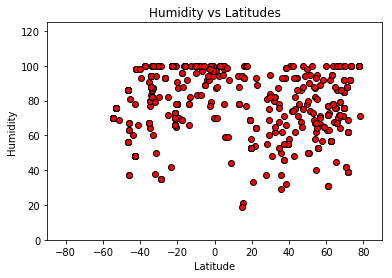

In [187]:
plt.scatter(weather_data['lat'], weather_data['humidity'], marker="o", facecolors="red", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,125)

# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Create a title, x label, and y label for our chart
plt.title("Humidity vs Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save an image of the chart and print to screen
plt.savefig("Humidity_Latitudes.png")
plt.show()

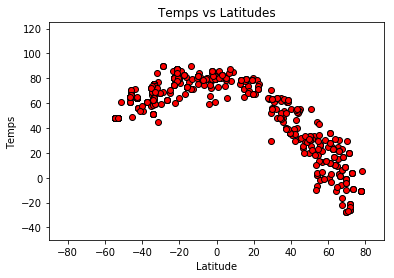

In [188]:
plt.scatter(weather_data['lat'], weather_data['temp'], marker="o", facecolors="red", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(-50,125)

# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Create a title, x label, and y label for our chart
plt.title("Temps vs Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Temps")

# Save an image of the chart and print to screen
plt.savefig("Temps_Latitudes.png")
plt.show()

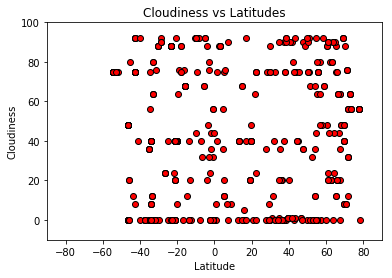

In [189]:
plt.scatter(weather_data['lat'], weather_data['clouds'], marker="o", facecolors="red", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(-10,100)

# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Create a title, x label, and y label for our chart
plt.title("Cloudiness vs Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save an image of the chart and print to screen
plt.savefig("Cloudiness_Latitudes.png")
plt.show()

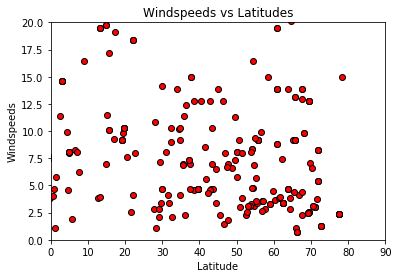

In [190]:
plt.scatter(weather_data['lat'], weather_data['windspeeds'], marker="o", facecolors="red", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,20)

# Set the upper and lower limits of our x axis
plt.xlim(0,90)

# Create a title, x label, and y label for our chart
plt.title("Windspeeds vs Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Windspeeds")

# Save an image of the chart and print to screen
plt.savefig("Windspeeds_Latitudes.png")
plt.show()

In [191]:
import cartopy.crs as ccrs

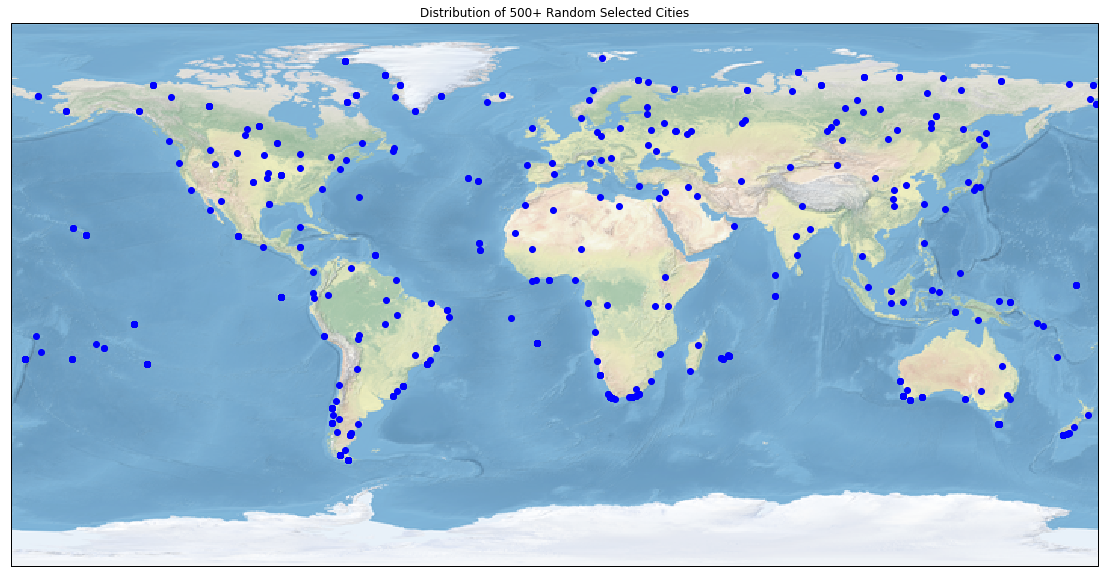

In [192]:

fig, ax = plt.subplots(figsize=(20,10))
ax= plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(weather_data['lon'], weather_data['lat'], color='blue', marker='o',
            transform=ccrs.Geodetic(),)
plt.title("Distribution of 500+ Random Selected Cities")
plt.savefig('randomcitiesworldmap.png')
plt.show()

In [193]:
weather_data.to_csv("WeatherpyData.csv", index=False)

In [178]:
#observable trends:
#temperature had a 'frown' pattern ..highest temps, as you would expect
#near the equator..as you move away from the equator, to higher latitudes esp
#temps go down. Lower latitudes are cooler but we are now coming off the 
#southern hemisphere summer, and northern hemisphere winter, so south of equator is
#not as cold as north right now..
#Clouidness, Humidity and Winspeed appear to have no relationship
#with latitudes. Cloudiness has alot of 0 readings, but that is prob just
#because there are many places at any given time with no clouds